In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from Mesh_1D import Mesh_1D
from FEM_nonlinear import FEM_nonlinear
from GL_quad import GL_Quadrature
from solvers import non_linear
%matplotlib inline

In [2]:
# create quadrature
GL=GL_Quadrature(2, False)
# create mesh: widths/subdivision/matID/srcID
mesh = Mesh_1D([0.45], [10], [0], [0],printout=False)  
# create BC
left  = {"type":"neu", "val":5.}
right = {"type":"dir", "val":300.}
bc = [left, right]
# create FEM
FE = FEM_nonlinear(GL, mesh, bc,printout=False)
# pass function to non linear solver
T = np.ones(11)*100
sol_direct = non_linear.Newton(T,FE.assemble_system,lin_solve='direct')
sol_gmres = non_linear.Newton(T,FE.assemble_system,lin_solve='gmres')
sol_matrix_free = non_linear.matrix_free_newton(T,FE.assemble_system)

In [3]:
print(sol_direct[1])
print(sol_matrix_free[1])
print(sol_gmres[1])

5
5
5


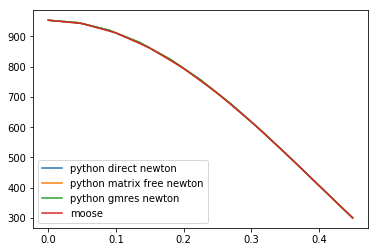

In [4]:
#import and plot moose solution
import pandas
temp = np.array([])
df = pandas.read_csv('moose.csv')
temp = df['temp'].values
# plot temperatures
x = np.linspace(0,0.45,11)
plt.plot(x,sol_direct[0],label='python direct newton')
plt.plot(x,sol_matrix_free[0],label='python matrix free newton')
plt.plot(x,sol_gmres[0],label='python gmres newton')
plt.plot(np.linspace(0,0.45,temp.shape[0]),temp,label='moose')
plt.legend(loc='best')